In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pwd

In [ ]:
%ls sample_data/

# Data read and cleanup

In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab_Notebooks/Data/eurovision_song_contest_1975_2019.csv',sep=';')

In [23]:
data.shape

(49832, 8)

In [26]:
data.columns = ['Year','Phase','Edition','Jury or Televoting','FromCountry','ToCountry','Points','Duplicate']

In [27]:
data.head()

,Year,Phase,Edition,Jury or Televoting,FromCountry,ToCountry,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN


In [53]:
print('Number of participating countries: ',data.FromCountry.nunique())
print('Number of participating countries: ',data.ToCountry.nunique())

np.sort(data.FromCountry.unique())

Number of participating countries:  52
Number of participating countries:  52


array(['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
       'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'The Netherlands', 'Turkey', 'Ukraine',
       'United Kingdom', 'Yugoslavia'], dtype=object)

Rename misplelled or duplicated countries

In [150]:
data.loc[data.FromCountry == 'The Netherands','FromCountry'] = 'The Netherlands'
data.loc[data.FromCountry == 'F.Y.R. Macedonia','FromCountry'] = 'North Macedonia'
data.loc[data.FromCountry == 'Macedonia','FromCountry'] = 'North Macedonia'

data.loc[data.ToCountry == 'F.Y.R. Macedonia','ToCountry'] = 'North Macedonia'
data.loc[data.ToCountry == 'Macedonia','ToCountry'] = 'North Macedonia'

countries = list(data.ToCountry.unique())

# Analysis

## Number of participating countries each year

In [ ]:
df_country_year = data.groupby(['Year','FromCountry']).agg(given_points = ('Points','sum'))
df_country_year.reset_index(inplace=True)

In [69]:
df_count_participants = df_country_year.groupby(['Year']).agg(nb_countries = ('FromCountry','count'))
df_count_participants.reset_index(inplace=True)
df_count_participants.tail(n=5)

,Year,nb_countries
40,2015,40
41,2016,42
42,2017,42
43,2018,43
44,2019,41


Text(0.5, 1.0, 'Number of countries participating each year')

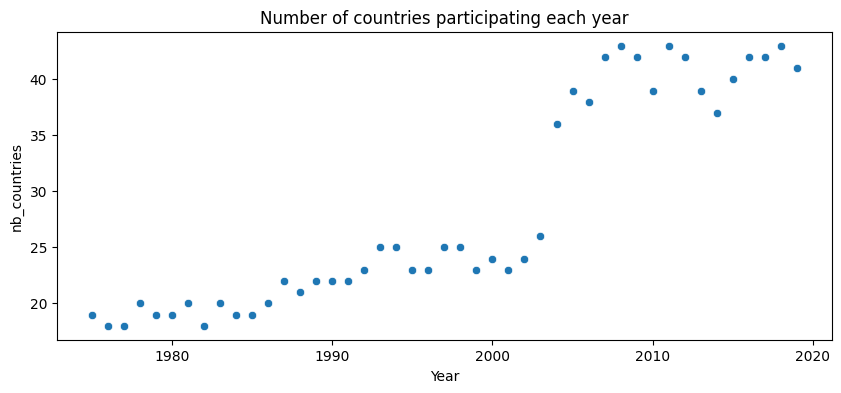

In [70]:
plt.figure(figsize=(10,4))
p = sns.scatterplot(data = df_count_participants, x = 'Year', y = 'nb_countries');
p.set_title('Number of countries participating each year')

## Number of times each country participated and the time range

In [83]:
df_stats_country = df_country_year.groupby(['FromCountry']).agg(min_year = ('Year','min'), max_year = ('Year','max'), nb_competitions = ('Year','count'))
df_stats_country.sort_values(by='nb_competitions', ascending=False).head(n=10)

,min_year,max_year,nb_competitions
FromCountry,,,
United Kingdom,1975,2019,45
Spain,1975,2019,45
France,1975,2019,44
Sweden,1975,2019,44
Germany,1975,2019,44
Norway,1975,2019,44
Ireland,1975,2019,43
Belgium,1975,2019,42
Switzerland,1975,2019,41


In [84]:
df_stats_country.sort_values(by='nb_competitions', ascending=True).head(n=10)

,min_year,max_year,nb_competitions
FromCountry,,,
Morocco,1980,1980,1
Serbia & Montenegro,2004,2006,3
Australia,2015,2019,5
Andorra,2004,2009,6
Slovakia,1994,2012,7
Monaco,1975,2006,8
Czech Republic,2007,2019,8
San Marino,2008,2019,10
Montenegro,2007,2019,11


In [157]:
df_stats_country[df_stats_country.index == 'Yugoslavia']

,min_year,max_year,nb_competitions
FromCountry,,,
Yugoslavia,1975,1992,13


## Number of times a country has won

A country has won if it was awarded the most cumulated points that year

In [88]:
df_points_country_year = data.groupby(['Year','ToCountry']).agg(given_points = ('Points','sum'))
df_points_country_year.reset_index(inplace = True)

In [111]:
idx_max_points = df_points_country_year.groupby(['Year']).idxmax(numeric_only = True)
index_winners = list(idx_max_points.given_points)

The list of winning countries for each year

In [112]:
df_winners = df_points_country_year.iloc[index_winners,:]

Number of wins per country

In [132]:
df_nb_wins = df_winners.groupby(['ToCountry']).agg(nb_wins = ('Year','count'))

In [133]:
df_top = df_nb_wins.sort_values(by = 'nb_wins', ascending=False).head(n=9)
df_top.reset_index(inplace = True)

In [134]:
df_top

,ToCountry,nb_wins
0,Ireland,6
1,Israel,4
2,Sweden,4
3,United Kingdom,3
4,Norway,3
5,Belgium,2
6,Denmark,2
7,France,2
8,The Netherlands,2


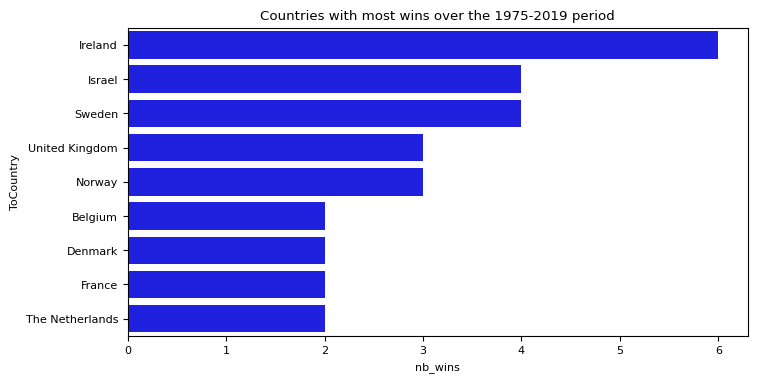

In [294]:
plt.figure(figsize=(8,4))
sns.barplot(data = df_top, y = 'ToCountry', x = 'nb_wins', color = 'blue').set_title('Countries with most wins over the 1975-2019 period');

# Geo plotting


In [ ]:
!pip install geopandas

In [138]:
import geopandas
%matplotlib inline
from shapely.geometry import Polygon
import warnings
warnings.filterwarnings(action="ignore")

In [140]:
plt.rcParams['figure.figsize']=(12,10)
plt.rcParams['font.size']=12

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig = geoplot.polyplot(world,projection=geoplot.crs.Orthographic(), figsize=(8, 4))
plt.show()

In [ ]:
europe=world[(world.continent=='Europe') | (world.name.isin(countries) )]

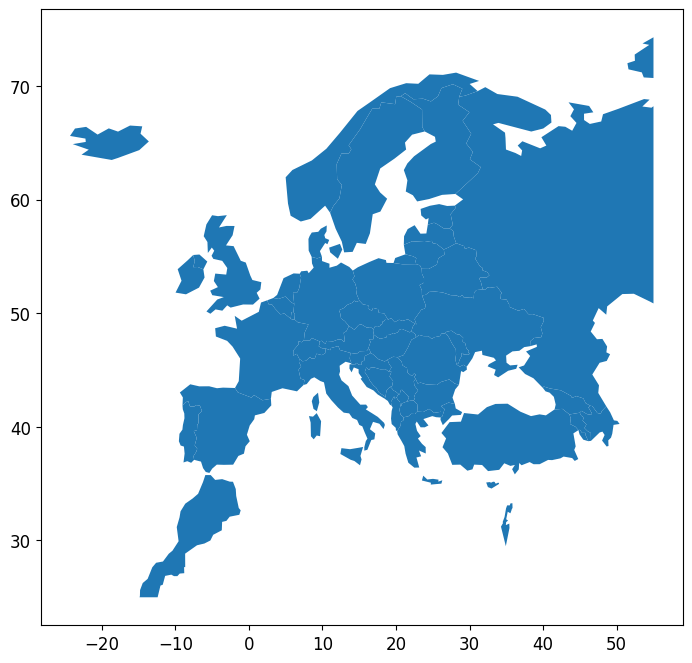

In [173]:
# Create a custom polygon that extends from 25° West to 55° East longitude and 25 ° North to 75 ° North latitude
polygon = Polygon([(-25,25), (55,25), (55,75),(-25,75)]);

#Clip polygon from the map of Europe
europe = geopandas.clip(europe, polygon) ;
europe.plot(figsize=(15,8));

In [193]:
df_nb_wins.reset_index(inplace=True)

In [194]:
eurovision_europe = europe.merge(df_nb_wins, how='left', left_on='name', right_on='ToCountry')

In [234]:
vmin = eurovision_europe.nb_wins.min()
vmax = eurovision_europe.nb_wins.max()

In [230]:
europe_labels = eurovision_europe
europe_labels['points'] = europe_labels.geometry.representative_point()

# set the representative point as the new geometry
europe_labels = europe_labels.set_geometry('points')

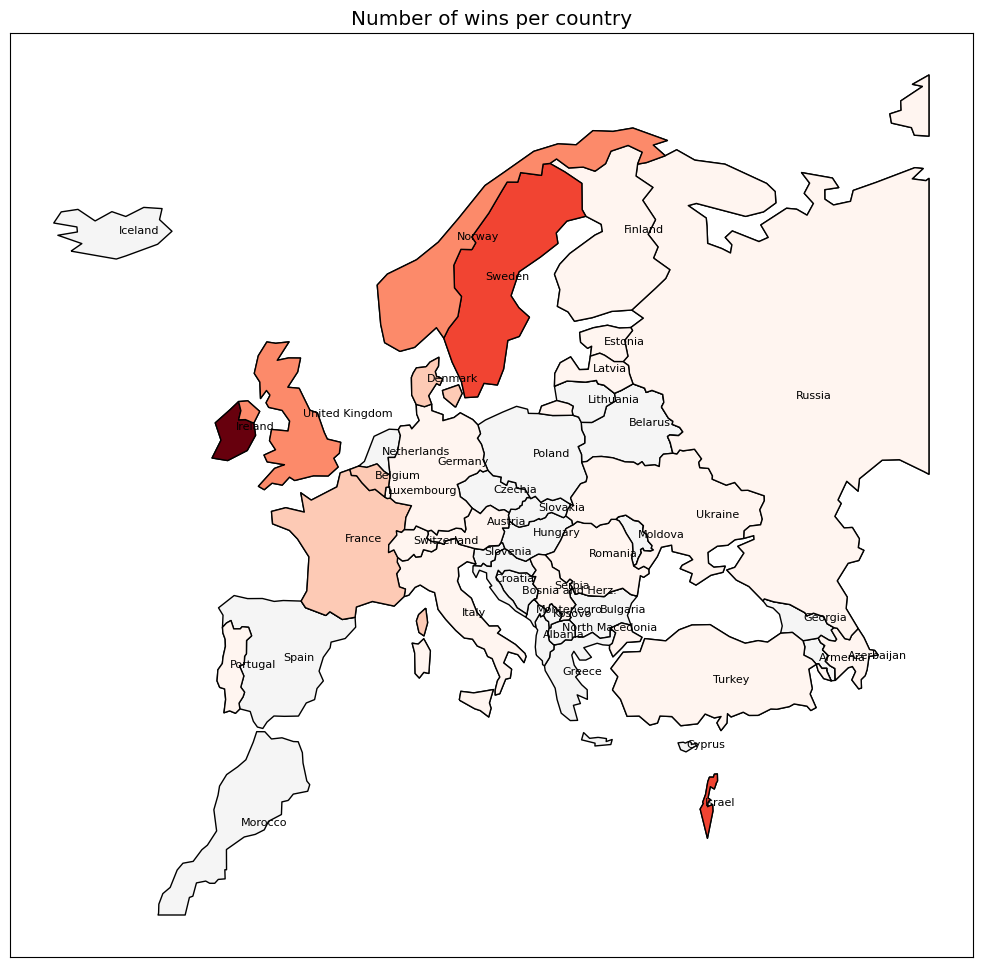

In [232]:
ax = europe.plot(color='whitesmoke',edgecolor='black', figsize=(25,12));

eurovision_europe.plot('nb_wins',cmap='Reds', edgecolor='black', vmin=vmin, vmax=vmax, ax = ax)
#europe_labels.plot(ax = ax)

# add countries names 
for i in range(0,europe_labels.shape[0]):
    plt.text(float(europe_labels.points.x[i]),float(europe_labels.points.y[i]),"{}".format(europe_labels.name[i]),size=8)

ax.set_title('Number of wins per country')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#plt.legend()
plt.show()

# France's popularity

Compute for France each year the quantile corresponding to their points. Need to estimate a distribution of points for each year and see how France is placed with respect to it

In [235]:
data.head()

,Year,Phase,Edition,Jury or Televoting,FromCountry,ToCountry,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN


In [246]:
df_points_country_year_final = data[(data.Phase == 'f') & (data['Jury or Televoting'] == 'J')].groupby(['Year','ToCountry']).agg(awarded_points = ('Points','sum'))
df_points_country_year_final.reset_index(inplace = True)

In [247]:
df_points_country_year_final

,Year,ToCountry,awarded_points
0,1975,Belgium,17
1,1975,Finland,74
2,1975,France,91
3,1975,Germany,15
4,1975,Ireland,68
...,...,...,...
1027,2019,Spain,6
1028,2019,Sweden,238
1029,2019,Switzerland,146
1030,2019,The Netherlands,230


Let's have a look at some distributions

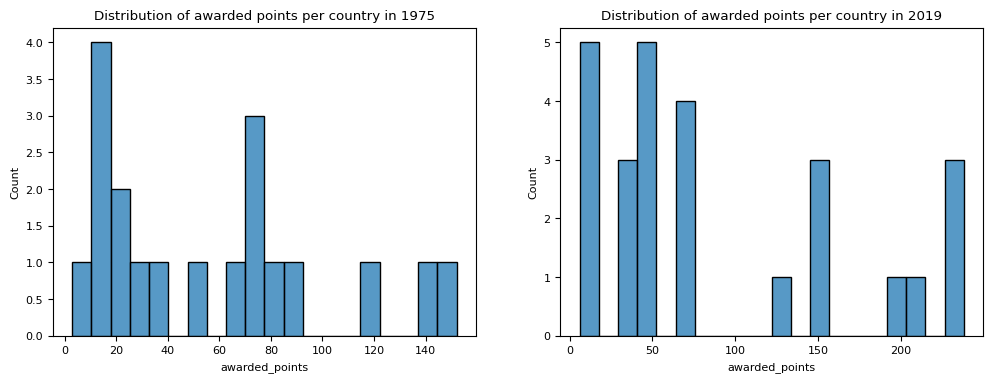

In [269]:
f, axes = plt.subplots(1, 2, figsize=(12,4))

year = 1975
sns.histplot(data = df_points_country_year_final[df_points_country_year_final.Year == year], x = 'awarded_points', bins = 20, ax = axes[0]).set_title('Distribution of awarded points per country in '+str(year));

year = 2019
sns.histplot(data = df_points_country_year_final[df_points_country_year_final.Year == year], x = 'awarded_points', bins = 20, ax = axes[1]).set_title('Distribution of awarded points per country in '+str(year));

In [273]:
from scipy import stats

In [287]:
years = list(df_points_country_year_final.Year.unique())
res = []

for year in years:
  df_temp = df_points_country_year_final[df_points_country_year_final.Year == year]
  rez_France = df_temp.awarded_points[df_temp.ToCountry == 'France']

  if len(rez_France > 0):
    p = stats.percentileofscore(df_temp.awarded_points,rez_France)
    res.append(p[0])
  else:
    p = np.NaN
    res.append(p)

In [ ]:
df_France = pd.DataFrame({'Year' : years, 'percentile' : res})

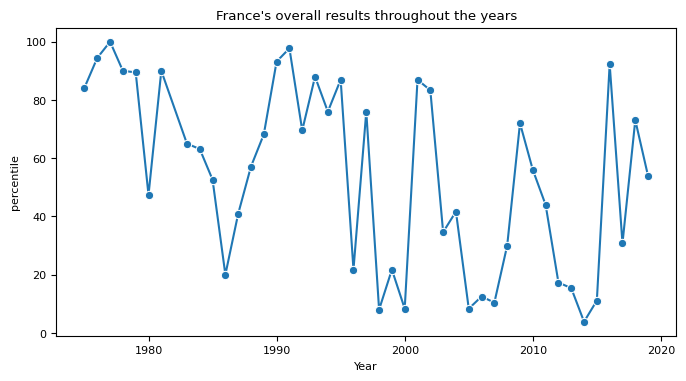

In [301]:
plt.figure(figsize=(8,4))
sns.lineplot(data = df_France, x = 'Year', y = 'percentile', marker = 'o').set_title('France\'s overall results throughout the years');

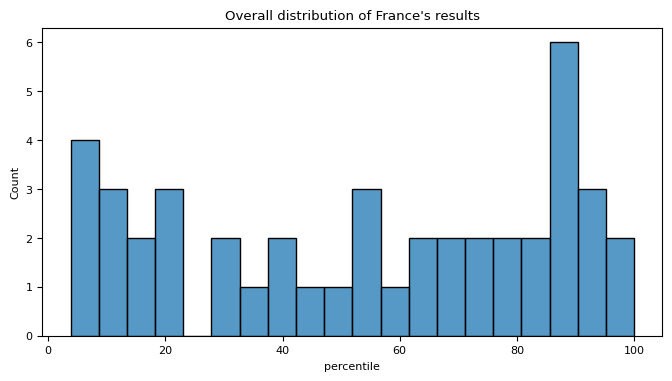

In [308]:
plt.figure(figsize=(8,4))
sns.histplot(data = df_France, x = 'percentile', bins = 20).set_title('Overall distribution of France\'s results');

# Friends and aliances



In [312]:
df_friends = data[data['Jury or Televoting'] == 'J'].groupby(['FromCountry','ToCountry']).agg(sum_points = ('Points','sum'))
df_friends.reset_index(inplace=True)

In [318]:
df_friends.sort_values(by = 'sum_points', ascending = False).head(n=40)

,FromCountry,ToCountry,sum_points
553,Cyprus,Greece,395
676,Denmark,Sweden,376
1668,Norway,Sweden,369
946,Greece,Cyprus,352
2429,United Kingdom,Ireland,272
777,Finland,Sweden,257
1080,Iceland,Sweden,248
2164,Sweden,Denmark,248
1636,Norway,Denmark,247
2452,United Kingdom,Sweden,246
